# Unit 5 - Financial Planning


In [108]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [109]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [110]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [111]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [112]:
# Fetch current BTC price
requests.get(btc_url)
response_btc_data = requests.get(btc_url)
current_btc_price = response_btc_data.content

# Convert data to json format
import json
current_btc_price = response_btc_data.json()
print(json.dumps(current_btc_price, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18588650,
            "total_supply": 18588650,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 32565.0,
                    "volume_24h": 48461999221,
                    "market_cap": 605337696383,
                    "percentage_change_1h": -1.31961651054179,
                    "percentage_change_24h": 11.6089166960232,
                    "percentage_change_7d": 31.9961365927112,
                    "percent_change_1h": -1.31961651054179,
                    "percent_change_24h": 11.6089166960232,
                    "percent_change_7d": 31.9961365927112
                },
                "CAD": {
                    "price": 41478.0405,
                    "volume_24h": 61726048407.7877,
                    "ma

In [113]:
# Identify current BTC price
current_btc_price = current_btc_price['data']['1']['quotes']['USD']['price']
print(current_btc_price)

32565.0


In [114]:
# Fetch current ETH price
requests.get(eth_url)
response_eth_data = requests.get(eth_url)
current_eth_price = response_eth_data.content

# Convert data to json format
current_eth_price = response_eth_data.json()
print(json.dumps(current_eth_price, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114089872,
            "total_supply": 114089872,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 781.1,
                    "volume_24h": 16553808823,
                    "market_cap": 89662484521,
                    "percentage_change_1h": 0.0016439760277197,
                    "percentage_change_24h": 7.17541668964417,
                    "percentage_change_7d": 24.6857334639128,
                    "percent_change_1h": 0.0016439760277197,
                    "percent_change_24h": 7.17541668964417,
                    "percent_change_7d": 24.6857334639128
                },
                "CAD": {
                    "price": 994.88707,
                    "volume_24h": 21084586297.8551,
                    "m

In [115]:
# Identify current ETH price
current_eth_price = current_eth_price['data']['1027']['quotes']['USD']['price']
print(current_eth_price)

781.1


In [116]:
# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39078.00
The current value of your 5.3 ETH is $4139.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [117]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [118]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify if the keys are successfully downloaded
print(f"Alpaca key type: {type(alpaca_api_key)}")
print(f"Alpaca secret key type: {type(alpaca_secret_key)}")

Alpaca key type: <class 'str'>
Alpaca secret key type: <class 'str'>


In [119]:
# Create the Alpaca API object - Function 'Rest'
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [120]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
all_portfolios = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
all_portfolios

AGG                                     SPY  \
                             open    high     low  close   volume    open   
2020-12-31 00:00:00-05:00  118.18  118.24  118.12  118.2  4325026  371.78   

                                                              
                             high      low   close    volume  
2020-12-31 00:00:00-05:00  374.66  371.232  373.85  52720911

In [121]:
# Pick AGG and SPY close prices
agg_close_price = float(all_portfolios['AGG']['close'])
spy_close_price = float(all_portfolios['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.2
Current SPY closing price: $373.85


In [122]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23640.00
The current value of your 50 SPY shares is $18692.50


### Savings Health Analysis

In [123]:
# Set monthly household income
monthly_income = 12000

# Calculate my total crypto assets and shares
my_total_crypto = my_btc_value + my_eth_value
my_total_shares = my_agg_value + my_spy_value

# Set the data for the shares value DataFrame
value_data = {
    "amount":[my_total_crypto, my_total_shares]
} 

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index =['crypto', 'shares'])
display(df_savings)

,amount
crypto,43217.83
shares,42332.50


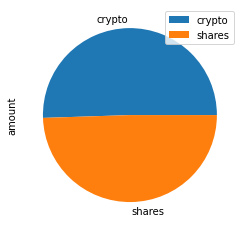

In [124]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [125]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_total_crypto + my_total_shares
print(f"My total amount of saving is ${total_savings:0.2f}")

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! you have enough money in your emergency fund")
    
elif total_savings == emergency_fund:
    print(f"Congratulations! you have reached your financial goal")
    
else:
    print(f"Sorry! you are still missing ${total_savings - emergency_fund:0.2f} away from your financial goal")

My total amount of saving is $85550.33
Congratulations! you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [126]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [127]:
# Set timeframe to '1D'
timeframe = "1D"

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [128]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [129]:
# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [130]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994999,0.979198,1.009429,1.012919,0.998494,0.995940,0.999967,1.008479,1.017443,0.987114,...,0.985458,0.999605,1.004315,1.005786,0.996572,1.008138,0.988415,0.998940,0.993164,1.011103
2,0.998787,0.968086,1.008712,1.023978,0.995223,1.002665,0.996173,1.002996,1.018015,0.984797,...,0.986461,0.993514,1.001237,1.013390,1.008626,1.006859,0.990516,0.999873,1.005687,1.008405
3,0.999754,0.960033,1.017886,1.027497,0.991123,1.013292,0.995759,1.000815,1.008732,0.988057,...,0.992928,1.001032,1.005628,1.011390,0.995711,1.003208,0.986405,0.991440,1.004069,1.005910
4,1.003966,0.969715,1.013189,1.023337,0.989938,1.010272,0.991841,1.005674,0.998230,0.993934,...,0.993530,0.998638,1.008330,1.005409,1.008426,1.000867,0.993470,0.989178,1.000545,1.002211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.045359,10.031770,13.487463,21.459798,8.130467,7.759078,7.310078,25.193432,6.887439,3.933703,...,6.642832,7.334801,2.800257,4.403198,5.960541,6.444197,1.309505,6.182893,12.634843,7.347887
7557,3.064694,10.086958,13.398145,21.449467,8.034673,7.710009,7.390661,25.239325,6.992192,3.972751,...,6.649806,7.385733,2.813455,4.378268,6.029037,6.513433,1.324546,6.250140,12.593789,7.449264
7558,3.047649,10.196946,13.456110,21.547102,8.094521,7.761834,7.448410,25.221123,7.035734,3.977495,...,6.665326,7.393971,2.805877,4.323458,6.007334,6.502925,1.317158,6.215103,12.553576,7.462400
7559,3.060113,10.138927,13.421150,21.440706,8.171132,7.736561,7.460292,25.245535,7.063057,3.964958,...,6.593975,7.420558,2.820308,4.303546,6.000239,6.445084,1.295830,6.239587,12.506446,7.492534


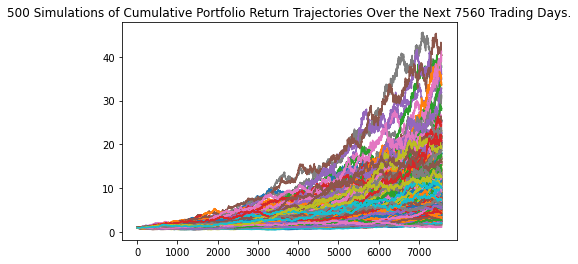

In [131]:
# Plot simulation outcomes
line_plot = MC_30_years.plot_simulation()

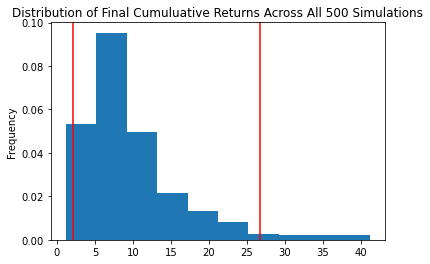

In [132]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_years.plot_distribution()

### Retirement Analysis

In [133]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_yr_summary_stat = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(thirty_yr_summary_stat)

count           500.000000
mean              9.760391
std               6.665067
min               1.161588
25%               5.511008
50%               7.923181
75%              11.922572
max              41.243741
95% CI Lower      2.157761
95% CI Upper     26.744925
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [134]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_yr_summary_stat[8]*20000,2)
ci_upper = round(thirty_yr_summary_stat[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43155.22 and $534898.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [135]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_yr_summary_stat[8]*initial_investment,2)
ci_upper = round(thirty_yr_summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64732.84 and $802347.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [136]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [137]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998368,1.002007,0.993729,0.995364,1.004523,1.010519,0.994388,0.996950,0.993060,1.010576,...,1.003621,1.013898,1.001039,0.995142,0.997608,1.002075,1.004373,1.002478,0.985791,1.009757
2,0.997406,0.999789,0.991742,1.000050,1.001336,1.017984,0.989225,1.018901,1.002266,1.018836,...,1.019881,1.012281,0.992768,0.989364,0.997222,0.998800,1.001705,1.011065,0.979763,1.012780
3,0.994178,1.008209,0.983272,1.000693,1.002686,1.030410,0.982663,1.027607,1.016393,1.025816,...,1.015248,1.007897,0.994381,0.991371,1.003112,1.018613,1.005541,1.021846,0.974965,0.996843
4,0.991934,1.002917,0.978445,1.011027,1.014841,1.037972,0.988072,1.027972,1.017219,1.033695,...,1.011123,1.010479,0.982082,0.995309,1.000259,1.022143,1.008225,1.037127,0.976471,1.003308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.799853,1.155203,1.582267,1.438178,1.663794,1.864090,0.989203,2.309199,1.758279,1.380144,...,1.033506,1.397959,1.484203,1.289073,1.209084,2.236906,1.712187,0.938530,3.136725,1.133671
1257,2.807322,1.136380,1.581446,1.441549,1.668603,1.895625,0.982100,2.323074,1.768848,1.363882,...,1.031787,1.403275,1.498072,1.282831,1.225646,2.249719,1.697552,0.944955,3.172528,1.129908
1258,2.797050,1.127733,1.577939,1.434864,1.653126,1.902844,0.966491,2.331193,1.774042,1.350759,...,1.034894,1.402665,1.497935,1.291318,1.229622,2.277231,1.687290,0.943466,3.172180,1.125812
1259,2.816394,1.125740,1.606337,1.438265,1.639680,1.919629,0.971494,2.329547,1.766575,1.346183,...,1.019001,1.421231,1.516934,1.293393,1.220330,2.273738,1.691800,0.935665,3.206237,1.131800


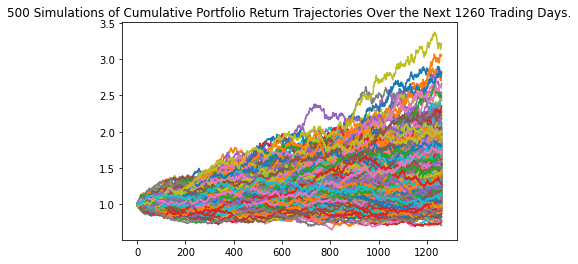

In [138]:
# Plot simulation outcomes
line_plot = MC_5_years.plot_simulation()

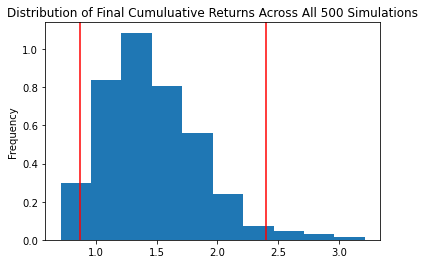

In [139]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_years.plot_distribution()

In [140]:
# Fetch summary statistics from the Monte Carlo simulation results
five_yr_summary_stat = MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(five_yr_summary_stat)

count           500.000000
mean              1.460092
std               0.393829
min               0.709041
25%               1.171839
50%               1.400334
75%               1.691345
max               3.213253
95% CI Lower      0.870733
95% CI Upper      2.396486
Name: 1260, dtype: float64


In [141]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_yr_summary_stat[8]*initial_investment,2)
ci_upper_five = round(five_yr_summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52243.97 and $143789.19


### Ten Years Retirement Option

In [142]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [79]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003065,0.996940,1.001354,0.997394,0.987884,0.996397,0.997710,1.001582,1.001989,1.005211,...,1.001257,0.990317,1.010417,0.989494,1.008455,0.995973,0.996852,0.998924,0.999510,0.999990
2,1.009045,1.007959,0.999737,1.001555,0.991534,0.989058,0.999022,0.995803,1.008111,1.007750,...,1.001634,0.990413,1.008317,0.987873,1.013024,1.003407,1.001763,0.982183,0.993109,0.999547
3,1.012752,1.004980,0.995700,1.013486,0.989712,0.983142,1.002487,0.996914,1.014351,1.003389,...,1.008325,1.003756,1.012761,0.986772,1.010861,0.992675,1.011614,0.988248,0.988888,1.001014
4,1.013569,1.001128,0.984432,1.007431,0.997329,0.987615,0.999072,0.992877,1.011703,1.003910,...,1.011873,1.003601,1.016574,1.000369,1.016581,0.997110,1.006914,0.990494,0.988582,1.007211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.502875,2.003244,2.648390,3.092538,1.245619,0.666652,2.476699,2.039689,4.658528,4.065484,...,2.206350,2.592431,3.197105,1.123081,1.616897,4.153201,1.886018,3.045438,2.411329,1.283839
2517,1.521666,2.015255,2.659112,3.083126,1.258732,0.668694,2.493943,2.033090,4.664545,4.107058,...,2.185254,2.576659,3.199526,1.128426,1.612870,4.153966,1.892407,3.059168,2.415141,1.285782
2518,1.530069,1.994299,2.658591,3.104513,1.265855,0.664881,2.479872,2.034851,4.651744,4.091238,...,2.153325,2.623909,3.220736,1.124889,1.599044,4.157508,1.900080,3.048080,2.399975,1.296079
2519,1.523714,2.004086,2.653624,3.107414,1.259325,0.664964,2.510420,2.007740,4.681517,4.084164,...,2.143750,2.626327,3.205427,1.126281,1.585980,4.106729,1.881412,3.049434,2.394858,1.289452


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

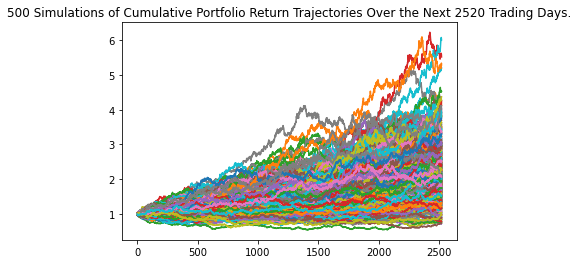

In [143]:
# Plot simulation outcomes
line_plot = MC_10_years.plot_simulation()

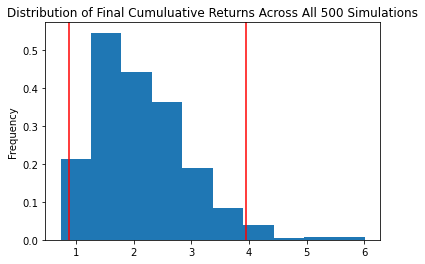

In [144]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_years.plot_distribution()

In [145]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_yr_summary_stat = MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(ten_yr_summary_stat)

count           500.000000
mean              2.121531
std               0.809394
min               0.730939
25%               1.526268
50%               1.988032
75%               2.591329
max               6.009586
95% CI Lower      0.884194
95% CI Upper      3.940896
Name: 2520, dtype: float64


In [146]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_yr_summary_stat[8]*initial_investment,2)
ci_upper_ten = round(ten_yr_summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $53051.65 and $236453.74
